In [82]:
#cloud check
import platform
import os

print("Running on:", platform.uname())
print("User:", os.getlogin())
print("Python path:", os.__file__)


Running on: uname_result(system='Darwin', node='Mac.fritz.box', release='24.3.0', version='Darwin Kernel Version 24.3.0: Thu Jan  2 20:23:36 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T8112', machine='arm64')
User: root
Python path: /opt/homebrew/Caskroom/miniforge/base/envs/mlops_zoomcamp/lib/python3.10/os.py


In [83]:
!python3 -V

Python 3.10.18


In [144]:
import pickle

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [85]:
#df = pd.read_parquet('/home/azureuser/j_harr/data/green_tripdata_2021-01.parquet')
df = pd.read_parquet('/Users/jordanharris/Code/mlops_zoomcamp/data/green_tripdata_2021-01.parquet')


In [86]:
df['duration'] = pd.to_datetime(df.lpep_dropoff_datetime) - pd.to_datetime(df.lpep_pickup_datetime)
df.duration = df['duration'].apply(lambda x: x.total_seconds() / 60)

In [109]:
td =  df.duration.iloc[0]
td

np.float64(3.933333333333333)

In [88]:
#df[df.trip_type == 2]


/var/folders/_r/_94p_t6s1933ynymfxl25_7h0000gn/T/ipykernel_2856/4187696625.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


<Axes: xlabel='duration', ylabel='Density'>

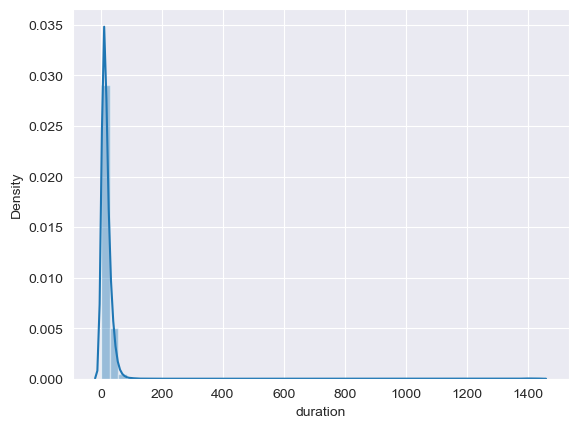

In [89]:
sns.distplot(df.duration)

In [90]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    76518.000000
mean        19.927896
std         59.338594
min          0.000000
50%         13.883333
95%         44.000000
98%         56.000000
99%         67.158167
max       1439.600000
Name: duration, dtype: float64

In [91]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [92]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [93]:
#df[categorical].astype(str).dtypes
df[categorical] = df[categorical].astype(str)
#df.dtypes

In [94]:
df[categorical + numerical].iloc[:10].to_dict(orient='records')

[{'PULocationID': '43', 'DOLocationID': '151', 'trip_distance': 1.01},
 {'PULocationID': '166', 'DOLocationID': '239', 'trip_distance': 2.53},
 {'PULocationID': '41', 'DOLocationID': '42', 'trip_distance': 1.12},
 {'PULocationID': '168', 'DOLocationID': '75', 'trip_distance': 1.99},
 {'PULocationID': '75', 'DOLocationID': '75', 'trip_distance': 0.45},
 {'PULocationID': '225', 'DOLocationID': '265', 'trip_distance': 12.19},
 {'PULocationID': '244', 'DOLocationID': '244', 'trip_distance': 3.39},
 {'PULocationID': '75', 'DOLocationID': '213', 'trip_distance': 6.69},
 {'PULocationID': '74', 'DOLocationID': '238', 'trip_distance': 2.34},
 {'PULocationID': '74', 'DOLocationID': '60', 'trip_distance': 5.48}]

In [95]:
train_dicts = df[categorical + numerical].to_dict(orient='records')
train_dicts

[{'PULocationID': '43', 'DOLocationID': '151', 'trip_distance': 1.01},
 {'PULocationID': '166', 'DOLocationID': '239', 'trip_distance': 2.53},
 {'PULocationID': '41', 'DOLocationID': '42', 'trip_distance': 1.12},
 {'PULocationID': '168', 'DOLocationID': '75', 'trip_distance': 1.99},
 {'PULocationID': '75', 'DOLocationID': '75', 'trip_distance': 0.45},
 {'PULocationID': '225', 'DOLocationID': '265', 'trip_distance': 12.19},
 {'PULocationID': '244', 'DOLocationID': '244', 'trip_distance': 3.39},
 {'PULocationID': '75', 'DOLocationID': '213', 'trip_distance': 6.69},
 {'PULocationID': '74', 'DOLocationID': '238', 'trip_distance': 2.34},
 {'PULocationID': '74', 'DOLocationID': '60', 'trip_distance': 5.48},
 {'PULocationID': '42', 'DOLocationID': '41', 'trip_distance': 0.9},
 {'PULocationID': '74', 'DOLocationID': '116', 'trip_distance': 2.08},
 {'PULocationID': '116', 'DOLocationID': '143', 'trip_distance': 4.64},
 {'PULocationID': '75', 'DOLocationID': '42', 'trip_distance': 1.68},
 {'PULo

In [96]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [97]:
X_train
dv.feature_names_
X_train.shape

(73908, 507)

In [98]:
target = 'duration'
y_train = df[target].values

In [99]:
y_train.shape

(73908,)

In [113]:
lr = LinearRegression()
lr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [114]:
y_pred = lr.predict(X_train)

/var/folders/_r/_94p_t6s1933ynymfxl25_7h0000gn/T/ipykernel_2856/4124956464.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/var/folders/_r/_94p_t6s1933ynymfxl25_7h0000gn/T/ipykernel_2856/4124956464.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label

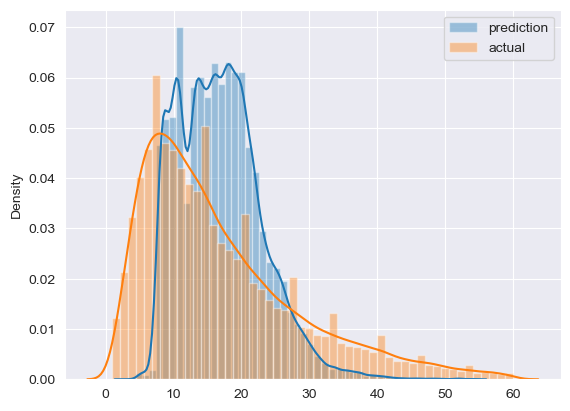

In [102]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')
plt.legend()

In [103]:
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")


MSE: 96.577
RMSE: 9.827
MAE: 7.224
R²: 0.278


In [105]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    df['duration'] = pd.to_datetime(df.lpep_dropoff_datetime) - pd.to_datetime(df.lpep_pickup_datetime)
    df.duration = df['duration'].apply(lambda x: x.total_seconds() / 60)
    df = df[(df.duration >= 1) & (df.duration <= 60)]
    categorical = ['PULocationID', 'DOLocationID']
    #numerical = ['trip_distance']
    df[categorical] = df[categorical].astype(str)

    return df

In [110]:
df_train = read_dataframe('/Users/jordanharris/Code/mlops_zoomcamp/data/green_tripdata_2021-01.parquet')
df_val = read_dataframe('/Users/jordanharris/Code/mlops_zoomcamp/data/green_tripdata_2021-02.parquet')


In [111]:
len(df_train), len(df_val)

(73908, 61921)

In [138]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']


In [139]:
categorical = ['PU_DO']  #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [140]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [141]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"MSE: {mse:.3f}")
print(f"Root MSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")

MSE: 60.198
Root MSE: 7.759
MAE: 5.340
R²: 0.594


In [148]:
with open('../models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)


In [143]:
lr = Lasso(alpha=0.0001)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"MSE: {mse:.3f}")
print(f"Root MSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")

MSE: 58.013
Root MSE: 7.617
MAE: 5.087
R²: 0.608


In [149]:
with open('../models/lasso.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [137]:
lr = Ridge(alpha=0.001)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"MSE: {mse:.3f}")
print(f"Root MSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")

MSE: 109.755
Root MSE: 10.476
MAE: 7.579
R²: 0.259


In [150]:
with open('../models/ridge.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)